In [1]:
import twitter
consumer_key = "MoBMZzE77TLwpXMTm7Tm37401"
consumer_secret = "jGPRxos03zyoqz5trR0ynR9RHTffkYXBUljtRSish3P8YDl9er"
access_token = "2835297398-uHudH16cyj5lkDTrWJMOYUhTulYwc77nUZQn2Sv"
access_token_secret = "eJINvSKJeHAdjnNFJl1PJVI2J9r7EVYrowVX4lsgCd2Aj"
authorization = twitter.OAuth(access_token, access_token_secret, consumer_key, consumer_secret)
t = twitter.Twitter(auth=authorization, retry=True)

In [2]:
import os 
output_filename = os.path.join(os.path.expanduser("~"), "Documents\Masters\Spring2019\Data Mining\Assignments\Week7", "python_tweets2.json")

In [3]:
original_users = [] 

user_ids = {}

In [4]:
import json

######### DO NOT RUN this again and again ########
##search_results = t.search.tweets(q="python", count=100, lang="en")['statuses']


In [5]:

#with open(output_filename, 'a' , newline='\n' )  as output_file:
#    for tweet in search_results :
#        if 'text' in tweet:
#            output_file.write(json.dumps(tweet))
#            output_file.write("\n\n")

            
############ after this run file label twitter to label newly imported file #############  
########## then copy the model to a file and load it here in week7 file
############ do it only once #############

            

In [6]:
output_filename = os.path.join(os.path.expanduser("~"), "Documents\Masters\Spring2019\Data Mining\Assignments\Week7", "python_tweets.json")
tweets_temp = []

with open(output_filename) as inf:
    for line in inf:
        if len(line.strip()) == 0: continue
        tweets_temp.append(json.loads(line)) 
    
tweets = []
for tweet in tweets_temp:
        #print(type(tweet))
        if 'text' in tweet:
            #print(tweet)
            original_users.append(tweet['user']['screen_name']) 
            user_ids[tweet['user']['screen_name']] = tweet['user']['id']
            tweets.append(tweet['text'])
            

print(len(tweets))

100


In [7]:
import os
model_filename = os.path.join(os.path.expanduser("~"), "Documents\Masters\Spring2019\Data Mining\Assignments\Week7", "python_context.pkl")

In [8]:
import spacy
from sklearn.base import TransformerMixin

# Create a spaCy parser
nlp = spacy.load('en')

In [9]:

    
class BagOfWords(TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        results = []
        for document in X:
            row = {}
            for word in list(nlp(document)):
                if len(word.text.strip()):
                    row[word.text] = True
                    #print (row)
            results.append(row)
        
        
        return results

In [10]:
from sklearn.externals import joblib
context_classifier = joblib.load(model_filename)
print(type(context_classifier))
print(context_classifier)

from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction import DictVectorizer

<class 'sklearn.pipeline.Pipeline'>
Pipeline(memory=None,
     steps=[('bag-of-words', <__main__.BagOfWords object at 0x00000249E21BF160>), ('vectorizer', DictVectorizer(dtype=<class 'numpy.float64'>, separator='=', sort=True,
        sparse=True)), ('naive-bayes', BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True))])


In [11]:
y_pred = context_classifier.predict(tweets)

In [12]:
relevant_tweets = [tweets[i] for i in range(len(tweets)) if y_pred[i] == 1]
relevant_users = [original_users[i] for i in range(len(tweets)) if y_pred[i] == 1]

In [13]:
print(len(relevant_tweets))
print(len(relevant_users))
print(len(tweets))

61
61
100


In [14]:
import time

def get_friends(t, user_id):
    friends = []
    cursor = -1
    while cursor != 0: 
        try:
            results = t.friends.ids(user_id= user_id, cursor=cursor, count=5000)
            friends.extend([friend for friend in results['ids']])
            cursor = results['next_cursor'] 
            if True or len(friends) >= 10000:
                break
        except TypeError as e:
            if results is None:
                print("You probably reached your API limit, waiting for 5 minutes")
                sys.stdout.flush() 
                time.sleep(5*60) # 5 minute wait 
            else: 
                # Some other error happened, so raise the error as normal
                raise e
        except twitter.TwitterHTTPError as e:
            print(e)
            break
        finally:
            # Break regardless -- this stops us going over our API limit
            time.sleep(60)
    return friends

In [15]:
friends = {} 
i = 1
for screen_name in relevant_users:
    user_id = user_ids[screen_name]
    i = i + 1
    print(i)
    friends[user_id] = get_friends(t, user_id)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62


In [16]:
friends = {user_id:friends[user_id] 
           for user_id in friends
           if len(friends[user_id]) > 0}



In [17]:
from collections import defaultdict
def count_friends(friends): 
    friend_count = defaultdict(int)
    for friend_list in friends.values(): 
        for friend in friend_list:
            friend_count[friend] += 1 
    return friend_count

In [19]:

friend_count = count_friends(friends)
print(len(friend_count))
from operator import itemgetter
best_friends = sorted(friend_count, key=friend_count.get, reverse=True)

38213


In [20]:
import sys
len(friends)

55

In [21]:

while len(friends) < 150:
    print(len(friends))
    for user_id in best_friends:
        if user_id in friends:
            continue
        print(user_id)
        sys.stdout.flush()
        friends[user_id] = get_friends(t, user_id) 
        for friend in friends[user_id]: 
            friend_count[friend] += 1
        best_friends = sorted(friend_count.items(), key=itemgetter(1), reverse=True)
        break

55
813286
56
(813286, 10)
57
(91333167, 10)
58
(534563976, 9)
59
(15804774, 9)
60
(816653, 8)
61
(20167623, 8)
62
(783214, 9)
63
(783214, 10)
64
(783214, 11)
65
(783214, 12)
66
(783214, 13)
67
(783214, 14)
68
(783214, 15)
69
(783214, 16)
70
(783214, 17)
71
(783214, 18)
72
(783214, 19)
73
(783214, 20)
74
(783214, 21)
75
(783214, 22)
76
(783214, 23)
77
(783214, 24)
78
(783214, 25)
79
(783214, 26)
80
(783214, 27)
81
(783214, 28)
82
(783214, 29)
83
(783214, 30)
84
(783214, 31)
85
(783214, 32)
86
(783214, 33)
87
(783214, 34)
88
(783214, 35)
89
(783214, 36)
90
(783214, 37)
91
(783214, 38)
92
(783214, 39)
93
(783214, 40)
94
(783214, 41)
95
(783214, 42)
96
(783214, 43)
97
(783214, 44)
98
(783214, 45)
99
(783214, 46)
100
(783214, 47)
101
(783214, 48)
102
(783214, 49)
103
(783214, 50)
104
(783214, 51)
105
(783214, 52)
106
(783214, 53)
107
(783214, 54)
108
(783214, 55)
109
(783214, 56)
110
(783214, 57)
111
(783214, 58)
112
(783214, 59)
113
(783214, 60)
114
(783214, 61)
115
(783214, 62)
116
(78321

In [22]:
len(friends)

150

In [23]:
import json
friends_filename = os.path.join(os.path.expanduser("~"), "Documents\Masters\Spring2019\Data Mining\Assignments\Week7", "python_friends.json")



In [50]:
with open(friends_filename, 'w') as outf: 
    json.dump(friends, outf)

TypeError: Object of type set is not JSON serializable

In [142]:
with open(friends_filename) as inf:
    friends = json.load(inf)

In [25]:
len(friends), type(friends)

(150, dict)

In [26]:
import networkx as nx 
G = nx.DiGraph()

In [27]:
print(friends)


{564523155: [2692, 305734622, 1110190452, 34918445, 1084212657761148928, 34947599, 143556525, 14625984, 590094251, 22207520, 153420950, 407387443, 15804843, 393637870, 30658670, 3320478908, 34312352, 2678072634, 41868331, 932698301694136320, 988784133253009409, 727518108, 67560826, 373995388, 2719608084, 24692013, 233386754, 3237721718, 1525145046, 2723217086, 2728620722, 2542134180, 396086906, 15481850, 19345116, 10284202, 2994636059, 870566128346697728, 826318867110653952, 3096292230, 928598105750147072, 2956121356, 926420351256551424, 6603532, 2541047887, 3335731978, 386538440, 808051518242979841, 257842996, 310128160, 967517348818313216, 967407659283570689, 3150530581, 758420112, 6662142, 323905773, 16025194, 559928876, 111060272, 577426516, 2273151884, 2685260780, 224161598, 2329194272, 31137589, 17974481, 49360662, 16954085, 29789545, 118115748, 802392555807735808, 10467232, 892033449758011392, 14846672, 58560915, 13874392, 872066394023710722, 941005371820400641, 2816840617, 9376

In [28]:
main_users = friends.keys()
G.add_nodes_from(main_users)

In [29]:
for user_id in friends:
    for friend in friends[user_id]:
        if str(friend) in main_users: 
            G.add_edge(user_id, friend) 

In [30]:
nx.draw?

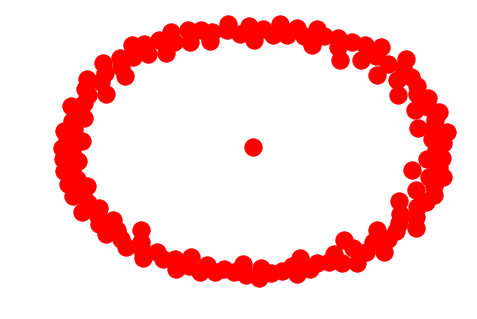

In [31]:
%matplotlib inline 
nx.draw(G)

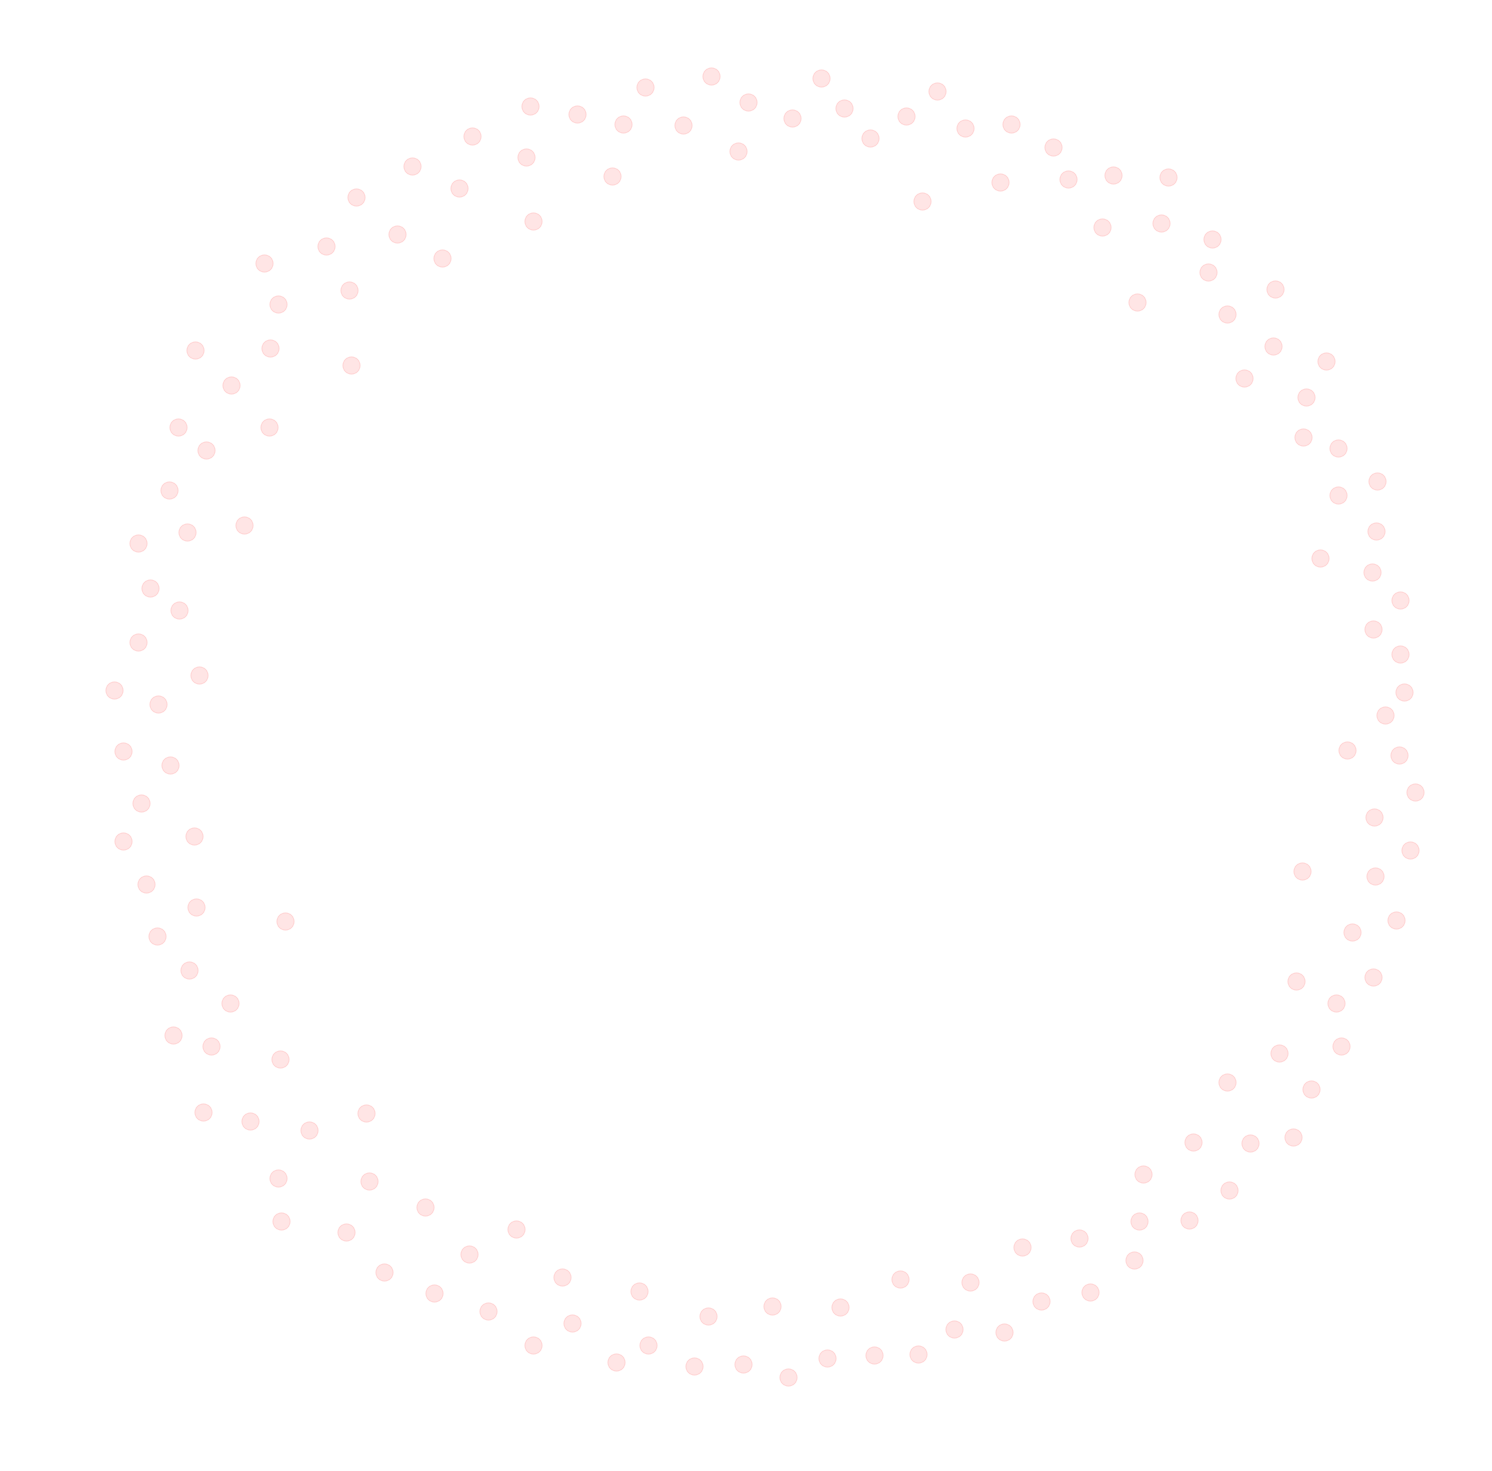

In [32]:
from matplotlib import pyplot as plt
plt.figure(3,figsize=(20,20))
nx.draw(G, alpha=0.1, edge_color='b')

In [33]:
friends = {user: set(friends[user]) for user in friends}


In [34]:
def compute_similarity(friends1, friends2):
    return len(friends1 & friends2) / (len(friends1 | friends2) + 1e-6)

In [35]:
def create_graph(followers, threshold=0): 
    G = nx.Graph()
    for user1 in friends.keys(): 
        for user2 in friends.keys(): 
            if user1 == user2:
                continue
            weight = compute_similarity(friends[user1], friends[user2])
            if weight >= threshold:
                G.add_node(user1) 
                G.add_node(user2)
                G.add_edge(user1, user2, weight=weight)
    return G

In [36]:
G = create_graph(friends)

C:\Users\sheth\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


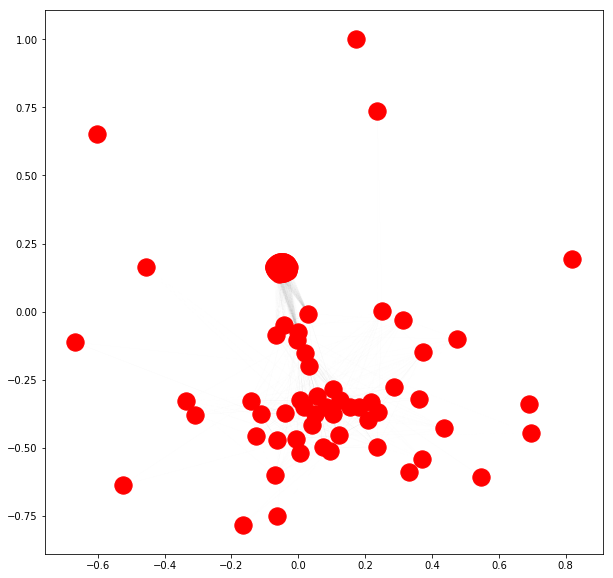

In [37]:
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos)
edgewidth = [ d['weight'] for (u,v,d) in G.edges(data=True)]
nx.draw_networkx_edges(G, pos, width=edgewidth)

In [38]:
G = create_graph(friends, 0.1)

In [39]:
sub_graphs = nx.connected_component_subgraphs(G)

In [40]:
for i, sub_graph in enumerate(sub_graphs):
    n_nodes = len(sub_graph.nodes()) 
    print("Subgraph {0} has {1} nodes".format(i, n_nodes))

Subgraph 0 has 94 nodes


In [41]:
G = create_graph(friends, 0.25) 
sub_graphs = nx.connected_component_subgraphs(G) 
for i, sub_graph in enumerate(sub_graphs): 
    n_nodes = len(sub_graph.nodes()) 
    print("Subgraph {0} has {1} nodes".format(i, n_nodes))

Subgraph 0 has 94 nodes


In [42]:
sub_graphs = nx.connected_component_subgraphs(G) 
n_subgraphs = nx.number_connected_components(G)

In [43]:
n_subgraphs

1

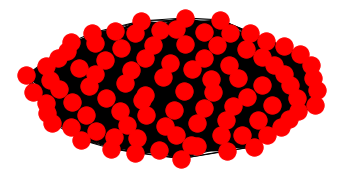

In [44]:
sub_graphs = nx.connected_component_subgraphs(G) 
n_subgraphs = nx.number_connected_components(G)

fig = plt.figure(figsize=(20, (n_subgraphs * 3)))
for i, sub_graph in enumerate(sub_graphs):
    
    ax = fig.add_subplot(int(n_subgraphs / 3)+1, 3, i+1)
    ax.get_xaxis().set_visible(False) 
    ax.get_yaxis().set_visible(False)
    nx.draw(sub_graph, ax=ax)

In [45]:
print("Done")

Done


In [46]:
import numpy as np
from sklearn.metrics import silhouette_score

def compute_silhouette(threshold, friends):
    G = create_graph(friends, threshold=threshold) 
    if len(G.nodes()) < 2:
        return -99
    sub_graphs = nx.connected_component_subgraphs(G)

    if not (2 <= nx.number_connected_components(G) < len(G.nodes()) - 1): 
        return -99

    label_dict = {}
    for i, sub_graph in enumerate(sub_graphs): 
        for node in sub_graph.nodes(): 
            label_dict[node] = i

    labels = np.array([label_dict[node] for node in G.nodes()])
    X = nx.to_scipy_sparse_matrix(G).todense()
    X = 1 - X
    return silhouette_score(X, labels, metric='precomputed')

In [47]:
def inverted_silhouette(threshold, friends):
    return -compute_silhouette(threshold, friends)

In [48]:
from scipy.optimize import minimize
result = minimize(inverted_silhouette, 0.1, args=(friends,))

In [49]:
result

      fun: 99
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([0.1])